In [20]:
# Importing librairies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = pd.DataFrame(dataset['train'])

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)

In [24]:
df_us = df[df['job_country'] == 'United States'].copy()

In [25]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


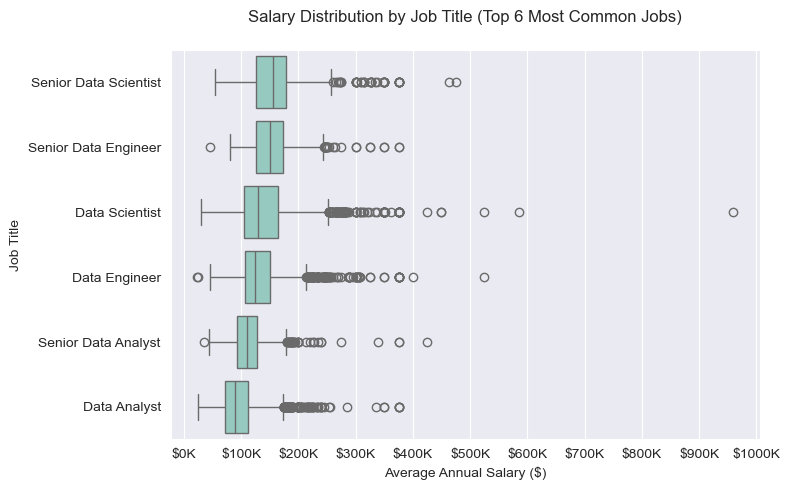

In [22]:
# Get the 6 most common jobs
top_6_jobs = df_us['job_title_short'].value_counts()[:6].index

# Filter DataFrame to keep only these 6 jobs
df_filtered = df_us[df_us['job_title_short'].isin(top_6_jobs)].copy()

# Calculate median salary for each job and sort in descending order
job_salary_medians = df_filtered.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)

# Reorder categories based on median salary order
df_filtered['job_title_short'] = pd.Categorical(df_filtered['job_title_short'], 
                                              categories=job_salary_medians.index, 
                                              ordered=True)

# Create figure with custom size
plt.figure(figsize=(8, 5))

# Create horizontal boxplot with sorted data
sns.boxplot(data=df_filtered, 
           x='salary_year_avg',  # Salary on x-axis
           y='job_title_short',  # Jobs on y-axis
           orient='h')          # Horizontal orientation

# Customize the plot
plt.title('Salary Distribution by Job Title (Top 6 Most Common Jobs)', 
         fontsize=12, pad=20)
plt.xlabel('Average Annual Salary ($)', fontsize=10)
plt.ylabel('Job Title', fontsize=10)

# Get the current axis
ax = plt.gca()

# Calculate min and max values rounded to nearest 100K
min_salary = (df_filtered['salary_year_avg'].min() // 100000) * 100000
max_salary = ((df_filtered['salary_year_avg'].max() // 100000) + 1) * 100000

# Create ticks by steps of 100K
tick_values = list(range(int(min_salary), int(max_salary) + 100000, 100000))

# Set the ticks
ax.set_xticks(tick_values)

# Format ticks in $K format
ax.set_xticklabels([f'${int(x/1000)}K' for x in tick_values])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

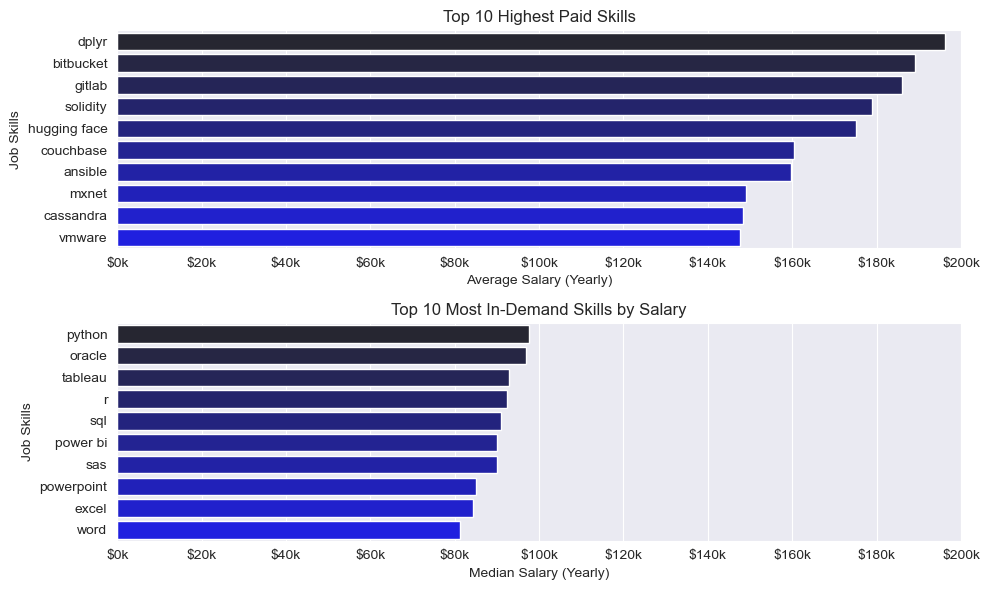

In [23]:
# Only get Data Analyst jobs in United States
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Explode the 'job_skills' column to create rows for each skill
df_exploded = df_da_us.explode('job_skills')

### TOP SKILLS BASED ON SALARY
# Calculate the average salaries by skill
salary_by_skill = df_exploded.groupby('job_skills')['salary_year_avg'].median().reset_index()
# Get the top 10 highest paid skills
top_paid_skills = salary_by_skill.nlargest(10, 'salary_year_avg')

# Create the figure
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

# Set fixed x-axis ticks
xticks = [x for x in range(0, 220000, 20000)]
xticklabels = ['${:,.0f}k'.format(x/1000) for x in xticks]

# First plot
sns.barplot(
    x='salary_year_avg', 
    y='job_skills', 
    data=top_paid_skills,
    ax=ax[0],
    hue='job_skills',
    palette='dark:b',
    legend=False
)
ax[0].set_title('Top 10 Highest Paid Skills')
ax[0].set_xlabel('Average Salary (Yearly)')
ax[0].set_ylabel('Job Skills')
ax[0].set_xlim(right=200000)
ax[0].set_xticks(xticks)
ax[0].set_xticklabels(xticklabels)

### TOP SKILLS BASED ON COUNT
# Get the top 10 most in-demand skills by median salary
top_demanded_skills = df_exploded['job_skills'].value_counts().head(10).index.tolist()
df_skills = df_exploded[df_exploded['job_skills'].isin(top_demanded_skills)][['job_skills', 'salary_year_avg']]
median_salaries = df_skills.groupby('job_skills')['salary_year_avg'].median().reset_index()
median_salaries.sort_values(by='salary_year_avg', ascending=False, inplace=True)

# Second plot
sns.barplot(
    x='salary_year_avg', 
    y='job_skills', 
    data=median_salaries,
    ax=ax[1],
    hue='job_skills',
    #    palette='light:b_r',
    palette='dark:b',
    legend=False
)
ax[1].set_title('Top 10 Most In-Demand Skills by Salary')
ax[1].set_xlabel('Median Salary (Yearly)')
ax[1].set_ylabel('Job Skills')
ax[1].set_xlim(right=200000)
ax[1].set_xticks(xticks)
ax[1].set_xticklabels(xticklabels)

# Adjust layout and display
plt.tight_layout()
plt.show()